In [1]:
import osmnx as ox
# import matplotlib.pyplot as plt
# %matplotlib inline

import pickle as pkl

# Specify the name that is used to seach for the data
# place_name = "Bangkok, Thailand" #Thailand

# Fetch OSM street network from the location
# graph = ox.graph_from_place(place_name)
graph = pkl.load(open('bangkok_graph.pkl', 'rb')) 

# ox.basic_stats(graph)

In [3]:
import networkx as nx 

In [4]:
G = graph 

In [5]:
# nodes.items() show lat,long 
nodes = G.nodes()
n = G.number_of_nodes()

In [23]:
# cnt = 0 
# for u,v in nodes.items():
#     print(u,v)
#     cnt+=1
#     if(cnt==10):
#         break


51479828 {'y': 13.7525696, 'x': 100.5260262, 'street_count': 4}
51479831 {'y': 13.7519092, 'x': 100.5256993, 'street_count': 3}
51479856 {'y': 13.7532275, 'x': 100.5262837, 'street_count': 3}
61703336 {'y': 13.735508, 'x': 100.5626041, 'street_count': 3}
61703351 {'y': 13.6823662, 'x': 100.610412, 'street_count': 3}
61703358 {'y': 13.6622587, 'x': 100.6023471, 'street_count': 4}
61703359 {'y': 13.6587716, 'x': 100.6009208, 'highway': 'traffic_signals', 'street_count': 4}
61705864 {'y': 13.6612042, 'x': 100.6433283, 'street_count': 3}
61705866 {'y': 13.6719145, 'x': 100.6454685, 'street_count': 3}
61705868 {'y': 13.6778189, 'x': 100.6459456, 'street_count': 4}


In [6]:
m = G.number_of_edges()
print(m)

398051


In [30]:
# g = {}
# cnt = 0 
# for e in G.edges: 
#     g[]
#     print(e[0],e[1])
#     if(e[0]==1337580877 or e[1] == 1337580877): 
#         print(e)
#     cnt+=1
#     if(cnt==10):
#         break

(51479828, 1337580877, 0)
(51479856, 1337580877, 0)
(1337580877, 51479856, 0)
(1337580877, 51479828, 0)
(1337580877, 1337580882, 0)
(1337580882, 1337580877, 0)


In [35]:
print(nx.number_strongly_connected_components(G))

302


In [7]:
comp = nx.strongly_connected_components(G)
remove_nodes = set() 
for c in comp: 
    if(len(c)!=182072):
        remove_nodes = remove_nodes.union(c)
print(len(remove_nodes))

1079


In [13]:
coordinates = []
for v in remove_nodes : 
    coordinates.append(nodes[v])
#     print(nodes[v])
#     print(v)

In [17]:
print(coordinates[0]['x'])

100.6880749


In [18]:
G.remove_nodes_from(remove_nodes)

In [19]:
print(G.number_of_nodes())

182072


In [20]:
def get_euc(coords_1, coords_2):
    R = 6371000
    conversion_const = 0.0174533

    c_1 = (coords_1[0]*conversion_const,coords_1[1]*conversion_const)
    c_2 = (coords_2[0]*conversion_const,coords_2[1]*conversion_const)


    delta_phi = abs(c_1[1]-c_2[1])

    theta = c_1[0]
    delta_theta = abs(c_1[0]-c_2[0])

    del_x = R*cos(theta)*delta_phi 
    del_y = R*delta_theta

    return sqrt(del_x**2+del_y**2)

In [21]:
from osmnx.distance import nearest_nodes

In [24]:
rets = []
for i in range(len(coordinates)): 
    x = coordinates[i]['x']
    y = coordinates[i]['y']
#     print(x,y)
    ret = nearest_nodes(G, x, y, return_dist=True)
    rets.append(ret[1])
#     print(ret)

In [27]:
print(sorted(rets)[-10:])

[765.1772876953319, 773.4524988508966, 795.8120050355691, 807.286552902654, 828.9784472766128, 830.047994503396, 830.7932627928467, 837.0653527451875, 851.3197313243709, 865.4155713994141]


In [26]:
print(sorted(rets))

[2.3366927710930985, 4.977751855989756, 5.7334087843101145, 6.288286277977998, 6.747060953101779, 7.422113420956792, 8.18449444757202, 8.356810884355479, 9.691174736725955, 10.737758824495291, 10.952343446059743, 11.09976838027659, 12.455540456591045, 13.243242235412222, 13.355474295463521, 13.687998762174322, 13.782381920466934, 14.19208766598248, 15.102565094970737, 15.165586839668478, 15.760610707773239, 15.882737030193411, 15.960614671051031, 16.077900847004948, 16.313693149216082, 16.360401239438666, 16.537608192614965, 16.758685341393537, 17.04179938559183, 17.084938257081603, 17.927300648761673, 18.20990368732514, 18.29453620980854, 18.776719267146625, 19.290112200572533, 19.482125871318065, 19.595210385238808, 19.71972947653029, 19.84999244530894, 19.904740376847307, 20.219469031032737, 20.51210330696809, 20.589191034520944, 20.653353359026543, 20.696376331268898, 21.02845225533574, 21.354677460518126, 21.522335555564336, 21.640331416977368, 21.675383695742056, 21.9311230889250

In [1]:
all_dists = [2.3366927710930985, 4.977751855989756, 5.7334087843101145, 6.288286277977998, 6.747060953101779, 7.422113420956792, 8.18449444757202, 8.356810884355479, 9.691174736725955, 10.737758824495291, 10.952343446059743, 11.09976838027659, 12.455540456591045, 13.243242235412222, 13.355474295463521, 13.687998762174322, 13.782381920466934, 14.19208766598248, 15.102565094970737, 15.165586839668478, 15.760610707773239, 15.882737030193411, 15.960614671051031, 16.077900847004948, 16.313693149216082, 16.360401239438666, 16.537608192614965, 16.758685341393537, 17.04179938559183, 17.084938257081603, 17.927300648761673, 18.20990368732514, 18.29453620980854, 18.776719267146625, 19.290112200572533, 19.482125871318065, 19.595210385238808, 19.71972947653029, 19.84999244530894, 19.904740376847307, 20.219469031032737, 20.51210330696809, 20.589191034520944, 20.653353359026543, 20.696376331268898, 21.02845225533574, 21.354677460518126, 21.522335555564336, 21.640331416977368, 21.675383695742056, 21.931123088925077, 22.174640666349017, 22.338953750130507, 22.419846088969724, 22.467011693433932, 22.855190042606115, 23.981727110187837, 24.045434476320917, 24.213011731390917, 24.276287007749307, 24.56531210376807, 25.016296782163945, 25.0229121183849, 25.426712486026464, 25.427796344886122, 25.61709103077488, 25.801751633064452, 25.836581191627236, 26.06833103958103, 26.09253138626471, 26.346402015804095, 26.4866887782087, 26.511515670321007, 26.581334428542586, 26.721999378722284, 26.851788549520347, 26.960536729033198, 27.01952962795781, 27.04428568473639, 27.05978086876646, 27.514113521167975, 28.341977315243945, 28.376283675222687, 28.38483935974275, 28.39169490831807, 28.806540875098403, 29.000446089139373, 29.12279199397184, 29.432100763948394, 29.589024863107742, 29.612442267281615, 29.770448437006348, 29.817358658375625, 29.835734253912843, 30.112391818494206, 30.33554703509698, 30.54434599834438, 30.584718119768215, 30.622700503038118, 30.63188670364088, 30.809486405623254, 30.81418742153109, 30.938252477069085, 31.039503116230986, 31.52940311277513, 31.920442556940365, 31.92486023636945, 31.977965038907293, 32.2724689059122, 32.72557052815168, 32.76534656574611, 33.000438402316725, 33.16120987364942, 33.22381072271996, 34.17494061311659, 34.57478837069698, 35.049286100084785, 35.314340214924975, 35.417481099818254, 35.89590617213697, 35.961072426922264, 36.247840917807494, 36.318360823528586, 36.55585748785494, 36.629559594050235, 37.04056178386249, 37.451583033004944, 37.75049796424049, 37.83585161367231, 37.87730218186277, 38.40927296665313, 38.479439351560494, 38.77833053825675, 38.78963645463116, 38.82513794668778, 38.85351116771946, 38.946511256030675, 39.189079579976266, 39.281136528429236, 39.3410059454014, 39.3713477616846, 39.5594512975617, 39.60015150292737, 40.115383088686166, 40.280931651541756, 40.36893940675122, 40.37750962895521, 40.44202965092404, 40.57734992916014, 40.69059256685666, 41.23060571845077, 41.36440228032647, 41.54210930462457, 42.03023062618401, 42.15036621843301, 42.155905248531546, 42.44885232077393, 42.594004210531196, 42.82918266808356, 42.870037446734, 42.89272303725638, 42.935770937025595, 43.073882784863876, 43.09970516570516, 43.10843864828628, 43.22226817446658, 43.51760452402783, 43.51841123896488, 43.60284106961219, 43.64407570721169, 43.742495406038856, 43.868703740862834, 44.134916574843636, 44.48000423837051, 44.691210167332734, 44.83561798818341, 44.98245683831979, 45.296823969808685, 45.3859051016925, 45.51230433797298, 45.96688652372525, 46.19883865959186, 46.318721695530066, 46.54042840876439, 47.354575049055214, 47.43913314644216, 47.46910709605441, 47.784937856794926, 47.96947633945666, 48.14880167555506, 48.44240025100761, 48.50557589362127, 48.58872582047085, 48.64896063841334, 48.81192152119189, 48.99965776920195, 49.050968999883814, 49.05726644470816, 49.149795131848265, 49.41683430327326, 49.59540541544115, 50.062724681861, 50.13194336155475, 50.14112434170813, 50.16666986807608, 50.20675408915355, 50.22290488063222, 50.306276633737504, 50.431247458935786, 50.607685210907114, 50.639706864744866, 50.90225554590377, 51.21012990661639, 51.4244365016785, 51.43356786146343, 51.43376260064041, 51.64919427232356, 51.808984481956784, 52.46405659942897, 52.48906435550068, 52.59765466256327, 52.86211774561163, 53.048203283616466, 53.083756026622304, 53.23404097410627, 53.923505710014076, 54.096168858862434, 54.14994031192978, 54.30664836030053, 54.65723743101908, 54.99623098049567, 55.00387956637274, 55.0306662878874, 55.05992881599141, 55.10439177107195, 55.19338258489867, 55.38117764667429, 55.425566173351534, 55.54681554490678, 55.67521580992176, 55.8181465864895, 56.027586449390625, 56.08487283509967, 56.13593376477784, 56.16326955786752, 56.82357731565523, 56.94287858757259, 57.1571826028588, 57.995716614064754, 58.2799756434641, 58.50795773950109, 59.25607866219278, 59.73377312801236, 59.776766910930995, 59.89764254776565, 59.92270847721387, 59.94168437049918, 59.96259157636273, 60.1355658885689, 60.28510038017581, 61.24996089020302, 61.47505204334779, 61.57178947064456, 62.239557355515664, 62.52181818081589, 63.02864534617466, 63.18521166320423, 63.740556018633626, 64.17541935913458, 64.24571458704123, 64.33974958921898, 64.61575608905808, 64.77398130464726, 64.77684907207829, 64.84919848445028, 64.87106504055902, 64.98827355650529, 65.01735758238198, 65.4378124490292, 65.62645527593688, 65.6731362750718, 65.71373134197792, 65.71910765731518, 66.35765688007022, 66.73503994550202, 66.9737404360835, 67.16861230945557, 67.3119352418603, 67.48081654816099, 67.79650571715857, 67.86026548384756, 67.94360250164048, 68.17104073582588, 68.19331414687471, 68.45527329666236, 68.63229843879898, 68.83427363469784, 68.93174667292959, 69.54129635863283, 69.5882005304252, 69.6629846042485, 70.4936441920575, 71.10412406692099, 71.3815642215885, 71.53992505737489, 71.87779054306516, 72.04589294171474, 72.0530033084012, 72.39883338153355, 73.40564402458077, 73.4067151050849, 73.65802488440356, 73.82759406668418, 74.05734286074451, 74.10632686562803, 74.18127602520575, 74.36324309811708, 74.37331514919606, 75.19496306159726, 75.20905505127223, 75.75238754965389, 76.16326200904446, 76.27412876158147, 76.42537490992667, 76.4742548954411, 76.52019298728032, 76.56253003051584, 77.0066831793702, 77.09191245368854, 77.18926714346729, 77.44825987274464, 78.3391418730376, 78.50555477620931, 79.0862211897534, 79.2129183419623, 79.60487986094387, 79.81765505349247, 80.0556542129557, 80.37680539240613, 80.56546727802127, 81.07461191326139, 81.16498028375989, 81.44048717799846, 81.95325763704592, 82.6317137580754, 82.78364792447788, 83.50495034178147, 84.0909551774238, 84.23713470453266, 84.40524091522795, 84.4545810723347, 84.78915575390018, 84.96571705656075, 85.17870427889402, 85.67319938957915, 85.76976896505919, 86.22578535071503, 86.27087441774316, 86.39705640835363, 86.8097587204318, 87.4105915169777, 87.57953681171178, 87.97418249448219, 88.15684058264159, 88.7419034605143, 89.2388708693347, 89.6283488591045, 89.70197265757, 90.3347923415774, 90.33986398035267, 90.45881985379857, 90.50427489475669, 90.55617989492801, 90.571127460078, 91.03556314498182, 91.14037168809865, 92.37159797881093, 92.89492682479239, 92.91937704555865, 92.99446078152285, 93.48849518060798, 93.74966648946851, 94.78309240936467, 95.7688534563511, 95.95777360114516, 96.10778667027427, 96.72901753172344, 96.93188791464574, 97.72041792197271, 98.51994664694142, 98.94348293557745, 99.45090577821016, 99.50147225339163, 99.96170134198734, 100.38589101098773, 100.70351533779679, 100.80973585909666, 101.12581775298392, 101.13352214754913, 101.24532630448347, 102.3099228641937, 102.78986821372058, 102.8604521876811, 103.07395650789232, 103.50977339527947, 103.66526700998973, 103.70116700501853, 103.8635216945737, 104.38942274941991, 104.39896514822246, 105.05540356906315, 105.3039612368556, 105.32097331177377, 105.42135356414911, 105.6776344389341, 106.24556968306891, 108.58215401264356, 108.60227246958895, 108.6287301652827, 108.64944518761136, 108.78165310121383, 109.25045207786242, 109.4343764558368, 110.45151131123828, 111.58014095748118, 111.94332586444955, 112.01309350835893, 112.10630559119858, 112.18165543324876, 112.42470119365231, 113.29492765393277, 113.33717238056273, 113.74649954889543, 114.19697983355832, 114.84768716671059, 115.36672802745073, 115.55659515758255, 116.7979746033497, 117.4203514342536, 117.46551561868486, 117.59991328187363, 118.55204647441259, 118.66935289977576, 118.67882889270642, 119.05263802379605, 119.64244052075755, 120.27139273090992, 120.36964132247212, 120.76859119312121, 120.76901609531993, 121.0513763033251, 121.2364001339641, 121.36268562317309, 121.67130050490962, 121.72158348080303, 121.82393001135851, 121.83143201403277, 122.03881135846481, 122.06547937287101, 122.26097964893049, 122.26541601252258, 122.32389527207688, 122.48039817506478, 122.73465255617226, 122.87315674691627, 123.12867482790858, 123.34773552189266, 123.9266539891109, 124.0705021348497, 125.00565752575902, 125.08101939119982, 125.39404227385498, 125.52017678004063, 125.52038335366748, 127.72850795557828, 128.3368977404363, 129.028804712303, 129.6739872710152, 131.02423468334445, 131.07285987323533, 131.1337799423835, 131.584635037288, 132.6215644041183, 132.65622429997075, 132.7282734186879, 133.43177745636493, 133.68505729121955, 134.0026460915507, 134.20625743131268, 134.4931457839347, 135.0343102564019, 135.2291253928154, 135.8777159442551, 137.55649448002228, 137.6736315515406, 138.43602655978287, 139.24356110172928, 139.3360892654085, 139.35559942954637, 139.43312045660494, 139.72063499677253, 139.89462551554575, 140.3821424654647, 140.49127879667589, 140.8238484167675, 140.93784385519433, 141.6617165547753, 141.78688524175638, 142.30021817759518, 142.38083963006082, 143.3743111445371, 143.96655626279474, 145.44134135731753, 145.9046728552673, 146.04199152201113, 147.03239211787528, 147.3653441511819, 148.44984318323313, 
             148.53260193830644, 148.91423447232714, 148.92593101264666, 149.3585038643983, 149.660443929658, 150.8045110680796, 151.30544896373635, 151.56779407241268, 151.79738711487678, 152.01834903550093, 152.60784322733898, 152.8514678725727, 153.52276813912974, 153.77555112531002, 154.23781765756098, 154.24239060304353, 154.28291966726144, 154.68754051266214, 155.11202508553956, 155.44713359577742, 155.48891732884533, 156.02573595343296, 156.59647513672286, 156.59802869515065, 157.52380074699124, 157.74346800241437, 159.43295067100345, 159.44406881069747, 159.8917809765386, 160.25400984098005, 161.17709633331305, 161.46202644795724, 161.52776609138272, 162.07573306737316, 162.52958593924177, 163.27880545697553, 163.41335578081865, 164.02444187479142, 164.9288642492803, 165.65674257461959, 166.51883800742044, 166.54442913250188, 166.64470283616723, 166.85431953638223, 167.62772968106663, 167.63943728049946, 167.64279274901116, 167.73194944463285, 168.0638363189005, 168.09308681821318, 168.63308681576828, 169.1121515138063, 169.17916250694856, 169.92943090515934, 170.0884140872657, 170.18908857016947, 170.29525592183214, 170.50473830913347, 171.0357121364397, 171.3360685730418, 171.6226804292397, 171.72884142462107, 171.7839317394117, 173.16220511364094, 173.5093103677824, 174.16565300073339, 174.95205320494432, 175.1872596662994, 175.8707044769755, 176.08940075974482, 176.13041553959977, 176.78143895477263, 176.80926870678547, 177.17129819076138, 178.1483885524876, 178.27362723583582, 178.51721770676372, 178.8008535255711, 179.07055436292717, 179.86337262081756, 181.97339919441907, 182.14924282611622, 182.20713406207648, 182.65754608800353, 186.0409611738017, 186.66444372582228, 187.621955939825, 187.92448406338497, 189.21486304077027, 189.64997169187325, 190.03645880575567, 191.00582347162398, 191.4522535830262, 191.94443153800654, 192.28264045658844, 192.34335115976518, 192.4174340513094, 192.75641908438493, 193.27963458108223, 193.71272348181833, 194.0967472323627, 194.37445900999327, 195.0322586609462, 195.27599563528474, 195.44535081740307, 195.51486380507794, 195.97788863829126, 196.0212969180027, 196.25043428493564, 196.512975016513, 196.98003621055534, 197.7810063496025, 198.63713982724843, 200.52936799027975, 200.6097905286451, 201.80543827513432, 201.9067225520413, 204.15703454250962, 204.4547257013916, 204.9480871372789, 205.0954486917821, 206.68976900943926, 206.89211901521648, 207.05097000373317, 207.95147838861428, 208.14132441328073, 208.42725768564168, 208.8809155725253, 209.13373707321483, 209.29351481644122, 209.63093158209512, 209.73884461125837, 210.4039654725281, 210.4116617598975, 211.02511355678502, 211.0882014857334, 211.66975855576388, 213.32374357932926, 214.15528585620575, 214.7141045246882, 214.77928394940642, 214.79917473991338, 214.94512937638927, 214.95354981788083, 215.37721709633865, 215.6163565400604, 216.16115122670087, 217.3893779450192, 217.4484614659644, 217.60735436881652, 218.67270267389893, 219.05074134360493, 219.8669705763453, 220.63121495226972, 220.67154688913428, 220.70220529344456, 221.22156983496865, 221.53897186629575, 221.7554908995068, 222.56240850241556, 222.82593663016152, 223.3376159297584, 224.26888604445415, 224.28310967613496, 224.3417901311506, 225.20747445069222, 226.107918124028, 226.3285129221956, 227.93464485154036, 228.00403586630625, 228.07653682755378, 229.3408138774895, 229.5476054714265, 230.00605674149557, 230.72293645511107, 230.88955529674917, 232.26459108988763, 232.33447299872026, 233.05332429084066, 233.64776633401695, 234.2399267889688, 234.4545145842942, 234.934578688424, 235.78825665176424, 237.10296143645581, 237.62471282085437, 237.68929646653748, 239.69075443427397, 240.06111849110107, 240.7748590674776, 240.96936124265255, 241.6989128723722, 241.77941679857432, 242.3297387005305, 243.82892346440664, 243.87057111239434, 244.02826444089038, 244.51864893844993, 245.69384776413537, 247.5412745550773, 248.3918844738112, 249.28850708972857, 250.2405658210458, 250.25860122516747, 250.73703359383722, 250.78800466279907, 250.9696786731023, 251.8803579075626, 252.6860694644997, 252.92394506004348, 253.12211863174008, 253.77621567176868, 255.7139369320774, 255.72691415329916, 256.1684214695386, 256.66154959875615, 256.7662372239069, 256.82415634062824, 259.6987011988777, 260.2670308118109, 261.11758987311197, 261.20129004143934, 261.68994170387003, 262.7283261539372, 262.9801559560875, 263.0684514352523, 264.6576441949046, 265.7110651139191, 266.1301027536214, 266.3630980358431, 266.54640284642977, 267.1801034084207, 268.4676265616153, 268.8157858660665, 269.36598105563655, 269.53025475528653, 271.07005238535294, 272.1834896204757, 272.3638502627545, 273.0470727536752, 273.2286218142224, 274.2171753192221, 275.2995959847343, 275.5190850405988, 275.8804360807025, 277.6820901841392, 277.73130316538345, 277.88621530096987, 280.40885246518724, 280.5983762724884, 280.97997790375825, 281.15987061188895, 281.9170713068817, 283.45834984547787, 285.0591930797538, 285.46505016322874, 286.05812483885825, 286.2492186532933, 286.9836926346097, 287.04590269700094, 287.33285031238825, 287.5790340254628, 288.6233504257447, 288.84042060366573, 289.0280614704269, 289.5856955320952, 289.6638018308776, 290.04170282061006, 290.18232847270195, 291.58036802776815, 291.9869161638946, 293.44233768802536, 294.2563327288779, 295.00092996709833, 295.08018258219505, 295.80183998785475, 296.5719884306505, 296.92769770640456, 298.30669699177184, 298.51830678534793, 298.682525391786, 299.55764860482475, 299.6576875401786, 299.68704829858575, 300.76098440214116, 302.1155931312882, 302.6741342456039, 302.6797881950362, 302.70174590099504, 302.950286808954, 303.55402795571655, 304.45346017335913, 305.973692203266, 306.0777441571113, 306.2562408091994, 306.850755890867, 306.9524776001728, 307.16284669379274, 307.30178313558525, 307.4073098378743, 307.5094881470713, 309.7407986094717, 310.3300913961132, 311.32121661897656, 311.52637994110836, 311.6543646036202, 312.666601675401, 313.0112525460659, 313.2474424802998, 313.3837321859023, 313.76438815068343, 313.7678842652336, 317.71377431780024, 318.03022828345274, 320.41780977901163, 322.5291463428871, 322.5594452199398, 325.20522384802626, 325.62500851541216, 326.16537295068036, 326.36853247193284, 326.45155272610083, 326.63596970546257, 328.2052453396564, 328.5465051865655, 328.8973030896192, 331.06657067171005, 331.09073772144956, 332.8536655792669, 335.2142984777508, 335.83751530749277, 336.2649116623558, 336.7519271729063, 338.2973013403593, 338.40674430865795, 338.43956654243436, 339.52378700445246, 339.67632151337983, 340.3411170402597, 341.9560173678595, 342.60462281514447, 342.714272539975, 343.80117364936365, 344.1887796158405, 345.6436460280668, 346.00276727063766, 346.2479011208772, 347.6987639820165, 349.7703844301199, 351.7232464364951, 352.96544820247664, 353.39030793459847, 356.6566072849678, 357.18884841775423, 358.0401113928912, 358.5492986729113, 359.5739660386344, 359.79545795759907, 359.82773073975227, 361.4257501488848, 362.0728972349915, 362.10225078116446, 363.50791260330305, 364.05486246025487, 364.8170879758478, 366.36929951752893, 368.6474672164243, 368.9743405716515, 369.243850904893, 369.9636012770346, 370.116051272946, 370.2118284528778, 371.6403623393011, 371.78105820064474, 372.05265554835427, 372.59529837321804, 373.2650550259239, 373.91215631389423, 374.0053112842148, 375.51712774918127, 375.5878905104564, 375.94368072538424, 376.08265106245807, 376.34471890937766, 376.6442546138672, 377.1827111892907, 377.4916846363389, 377.66308052911745, 379.6739440311889, 379.8598629181254, 380.11171941110706, 381.0197350010167, 381.45811688370947, 381.8412270010761, 382.35340212254397, 383.2156668232909, 386.80656406368576, 386.83919272146517, 389.3389211848734, 390.4544840695587, 390.46473343373543, 391.2109920972553, 394.1719881923153, 394.85593521891576, 395.0841078692463, 396.689474396222, 397.30370726895535, 399.80349357838026, 401.0426480605191, 401.07259173575113, 402.7933014634551, 403.2468030872772, 403.5554938539514, 405.3972080697482, 405.6516241813954, 405.67860043289215, 405.8022187121249, 406.7619893908476, 407.3648978896114, 409.46992459421915, 409.52560618912156, 410.1398803703766, 410.9143282407176, 411.19664589313123, 412.72173063665593, 414.80641469321824, 414.8803516443967, 414.8843626330406, 416.17061621479434, 416.61732284643017, 417.78431909620815, 418.0395218904705, 418.80748632591207, 419.6757018045731, 420.238150555126, 421.0791143910771, 421.13475850052316, 421.8210233309249, 422.527569868837, 422.8434769355573, 423.69994796444223, 423.88573218910136, 427.6849183645237, 427.8173817574999, 427.9968378398565, 428.4702509435131, 429.7347549299895, 430.0428301767695, 431.2587563727474, 433.31112545424395, 433.83531820984086, 434.8072015663754, 436.554428013493, 437.31794637180946, 439.6249428315424, 442.02775381585764, 442.6731014657103, 443.4513242701961, 443.79246521930855, 444.09419639520445, 444.8053388977981, 445.73441161579825, 448.25409359726706, 448.82753633329577, 450.59733847555134, 450.9005938054525, 452.6415616436189, 453.98602374813294, 456.59564922456076, 460.01155495602296, 461.3882785117931, 462.455831403139, 463.4511716118101, 469.7358881029182, 474.4983852099836, 475.27310377271067, 476.6167797851786, 478.4163927226296, 479.18858562258447, 480.4663056695557, 483.8069352543126, 489.00844813440324, 489.4862931807812, 491.6014915586425, 492.4096277866826, 493.6292502768547, 494.6699121086965, 494.8529212517475, 495.77407222158615, 495.8903688590866, 497.20495532138324, 497.4074593033459, 499.5085890313083, 500.35640324068817, 504.12007186450154, 512.3945950735624, 516.4123400853892, 518.3975894232372, 534.48128077319, 537.8841128312226, 539.6017483076967, 549.0615666629083, 553.0525972663528, 560.0125516171654, 566.8815310098963, 571.047442148144, 572.0664986151155, 572.7149795374987, 575.0103564658748, 576.7706410048656, 578.1699959036863, 584.6301522917789, 587.3835010769612, 
    599.9076084153063, 601.715806612294, 608.7154145592345, 613.2660286672266, 615.7496559940494, 617.1431376813069, 626.1325043725299, 626.5553369326869, 635.7874030854399, 638.3735194644562, 639.5453000304605, 643.0898295953605, 643.3953601393657, 647.6343256129196, 651.3367130705515, 651.439555355657, 663.6781812205152, 666.2694217705204, 668.8359826581665, 669.2443533642107, 673.7944987424823, 673.895764798779, 675.6456718196279, 676.2617339927533, 679.0079627100677, 684.6013306379735, 690.1479140499798, 704.60989310671, 709.7316352329495, 711.8175772130832, 713.6157170911516, 717.9999699188771, 726.9466668737965, 737.143292448876, 738.0720772343172, 738.8708528313218, 740.2466396493844, 752.4052617266591, 765.1772876953319, 773.4524988508966, 795.8120050355691, 807.286552902654, 828.9784472766128, 830.047994503396, 830.7932627928467, 837.0653527451875, 851.3197313243709, 865.4155713994141]

In [2]:
import matplotlib.pyplot as plt

(array([179., 185., 118., 103.,  83.,  72.,  69.,  56.,  54.,  50.,  26.,
         21.,   6.,  11.,  12.,  13.,   6.,   7.,   2.,   6.]),
 array([  2.33669277,  45.4906367 ,  88.64458063, 131.79852457,
        174.9524685 , 218.10641243, 261.26035636, 304.41430029,
        347.56824422, 390.72218815, 433.87613209, 477.03007602,
        520.18401995, 563.33796388, 606.49190781, 649.64585174,
        692.79979567, 735.95373961, 779.10768354, 822.26162747,
        865.4155714 ]),
 <BarContainer object of 20 artists>)

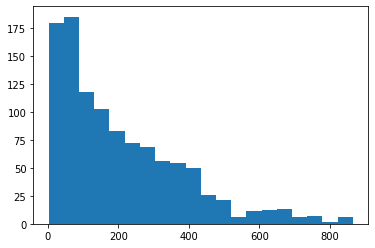

In [9]:
plt.hist(all_dists, bins = 20)

In [20]:
bin_size = 50
cnt = 20*[0]
for dist in all_dists: 
    dist_1 = int(dist+0.5)
#     print(dist_1//bin_size,dist_1)
    cnt[dist_1//bin_size]+=1
print(cnt) 


[200, 192, 130, 109, 89, 79, 67, 59, 57, 28, 10, 11, 14, 13, 10, 4, 5, 2, 0, 0]


In [24]:
import pandas as pd 
df = pd.DataFrame({'count': cnt})
df.index = [str(i*bin_size) for i in range(20)]
# df = df.sort_values(by='count', ascending=False)

#add column to display cumulative percentage
df['cumperc'] = df['count'].cumsum()/df['count'].sum()*100

#view DataFrame
df

,count,cumperc
0,200,18.535681
50,192,36.329935
100,130,48.378128
150,109,58.480074
200,89,66.728452
250,79,74.050046
300,67,80.259500
350,59,85.727525
400,57,91.010195
450,28,93.605190


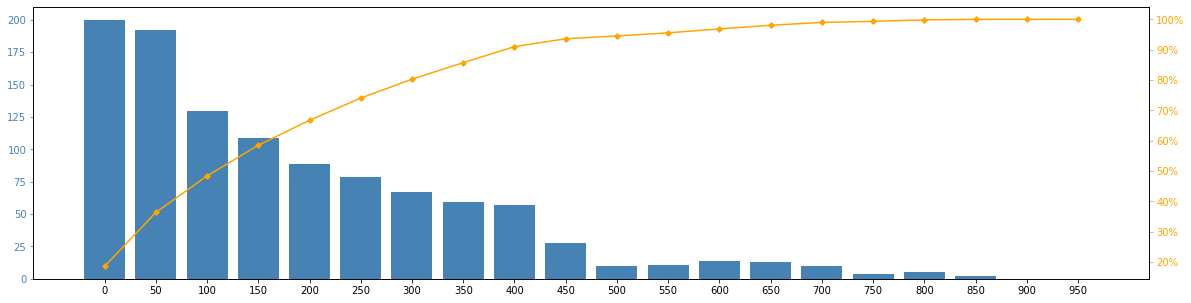

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'orange'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df.index, df['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()